# Fig. S3: Adaptational effects

# import

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.stats import mannwhitneyu
from scipy import stats

# --------------------------------------------------------------------------------------------------------------------

# Load datasets

In [2]:
file_path = 'ADD_YOUR_PATH_TO_DATA_HERE'

# Ctrl 1
with open(file_path+'/ctrl_dataset_c1.pkl', 'rb') as handle:
    dict_c1 = pickle.load(handle)
    
# Ctrl 2
with open(file_path+'/ctrl_dataset_c2.pkl', 'rb') as handle:
    dict_c2 = pickle.load(handle)

# --------------------------------------------------------------------------------------------------------------------

# Compute differences

In [3]:
#select only RGC types
rgc_types = np.where(dict_c1['cell_type']<33)[0]

In [4]:
#concatenate chirp and moving bars
ctrl_c1 = np.hstack((dict_c1['chirp'][rgc_types],dict_c1['bar'][rgc_types]))
ctrl_c2 = np.hstack((dict_c2['chirp'][rgc_types],dict_c2['bar'][rgc_types]))

In [5]:
# get mean responses from Ctrl dataset and its label
mean_chirp_c1 = np.zeros((32,249))
mean_chirp_c2 = np.zeros((32,249))
mean_bar_c1 = np.zeros((32,32))
mean_bar_c2 = np.zeros((32,32))

std_chirp_c1 = np.zeros((32,249))
std_chirp_c2 = np.zeros((32,249))
std_bar_c1 = np.zeros((32,32))
std_bar_c2 = np.zeros((32,32))

for i,j in enumerate(np.unique(dict_c1['cell_type'][rgc_types])):   
    idx = np.where(dict_c1['cell_type']==j)[0]
    mean_chirp_c1[i,:] = np.mean(dict_c1['chirp'][idx,:],axis=0)
    mean_chirp_c2[i,:] = np.mean(dict_c2['chirp'][idx,:],axis=0)
    mean_bar_c1[i,:] = np.mean(dict_c1['bar'][idx,:],axis=0)
    mean_bar_c2[i,:] = np.mean(dict_c2['bar'][idx,:],axis=0)    
    
    std_chirp_c1[i,:] = np.std(dict_c1['chirp'][idx,:],axis=0)
    std_chirp_c2[i,:] = np.std(dict_c2['chirp'][idx,:],axis=0)
    std_bar_c1[i,:] = np.std(dict_c1['bar'][idx,:],axis=0)
    std_bar_c2[i,:] = np.std(dict_c2['bar'][idx,:],axis=0)    

In [6]:
diff_ctrl_dataset = np.mean(ctrl_c2-ctrl_c1,axis=1)
diff_ctrl_dataset = {'diff':diff_ctrl_dataset,'cluster_id':dict_c1['cell_type'][rgc_types].flatten()}
df_diff_ctrl_dataset = pd.DataFrame(diff_ctrl_dataset)

## select types with more than 10 cells

In [7]:
# extract types with more than 10 cells per conditions
n_cells_per_group_ctrl = np.zeros(32)
for i in range(32):
    n_cells_per_group_ctrl[i] = df_diff_ctrl_dataset[df_diff_ctrl_dataset['cluster_id']==i+1]['diff'].values.shape[0]
    
good_types = np.where((n_cells_per_group_ctrl>=10))[0]
print(good_types+1)

[ 1  2  3  4  5 11 12 13 14 17 18 20 21 22 23 24 26 28 29 31 32]


# --------------------------------------------------------------------------------------------------------------------

# Plotting

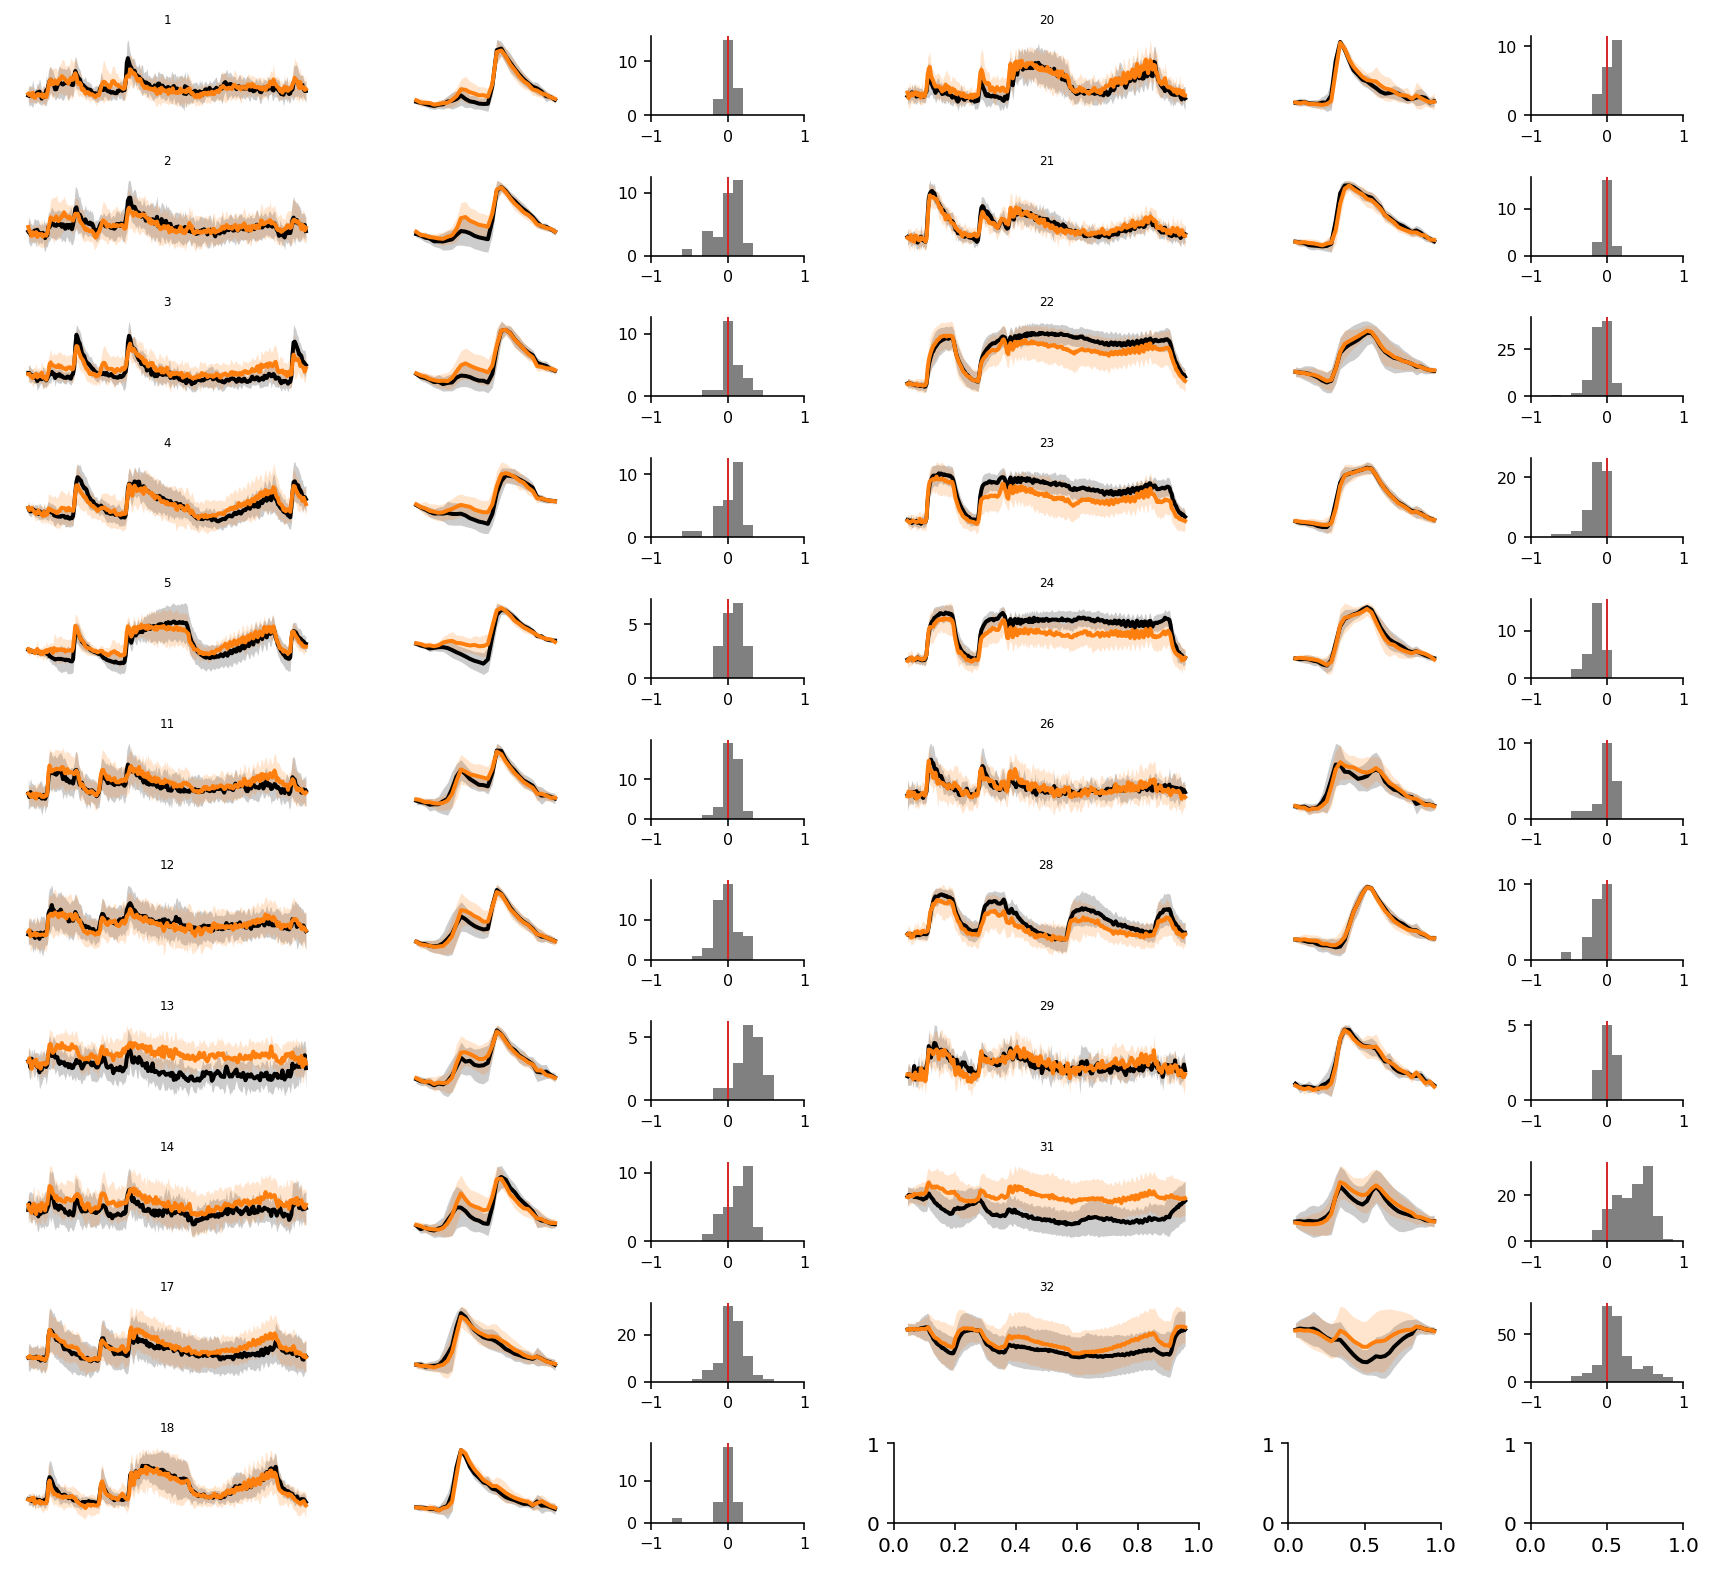

In [13]:
fs=8
color_ctrl = 'k'
color_ctrl2 = 'tab:orange'
lw=2

fig,ax = plt.subplots(11,6,figsize=(12,11),gridspec_kw={'width_ratios': [2, 1, 1, 2, 1, 1]})

r=0
c=0

for i,j in enumerate(good_types):
    
### Chirp
    # Ctrl 1: Chirp
    ax[r,c].plot(mean_chirp_c1[j,:],color=color_ctrl,lw=lw)
    ax[r,c].fill_between(np.arange(0,249,1),mean_chirp_c1[j,:]+std_chirp_c1[j,:],mean_chirp_c1[j,:]-std_chirp_c1[j,:],alpha=0.2,color=color_ctrl,edgecolor="b", linewidth=0.0)
    ax[r,c].axis('off')
    # Ctrl 2: Chirp
    ax[r,c].plot(mean_chirp_c2[j,:],color=color_ctrl2,lw=lw)
    ax[r,c].fill_between(np.arange(0,249,1),mean_chirp_c2[j,:]+std_chirp_c2[j,:],mean_chirp_c2[j,:]-std_chirp_c2[j,:],alpha=0.2,color=color_ctrl2,edgecolor="b", linewidth=0.0)
    ax[r,c].axis('off')
    ax[r,c].set_title(str(j+1),fontsize=6)
    
    
### Bar   
    # Ctrl 1: Bar
    ax[r,c+1].plot(mean_bar_c1[j,:],color=color_ctrl,lw=lw)
    ax[r,c+1].fill_between(np.arange(0,32,1),mean_bar_c1[j,:]+std_bar_c1[j,:],mean_bar_c1[j,:]-std_bar_c1[j,:],alpha=0.2,color=color_ctrl,edgecolor="b", linewidth=0.0)
    ax[r,c+1].axis('off')
    #Ctrl 2: Bar
    ax[r,c+1].plot(mean_bar_c2[j,:],color=color_ctrl2,lw=lw)
    ax[r,c+1].fill_between(np.arange(0,32,1),mean_bar_c2[j,:]+std_bar_c2[j,:],mean_bar_c2[j,:]-std_bar_c2[j,:],alpha=0.2,color=color_ctrl2,edgecolor="b", linewidth=0.0)
    ax[r,c+1].axis('off')
    
### Histogram
    # Difference Histogram
    ax[r,c+2].hist(df_diff_ctrl_dataset[df_diff_ctrl_dataset['cluster_id']==j+1]['diff'].values,bins=15,color='gray',alpha=1,range=[-1,1],edgecolor=None)
    ax[r,c+2].set_xlim(-1,1)
    ax[r,c+2].axvline(0,color='tab:red',lw=0.99,ls='-')
    ax[r,c+2].tick_params(axis='both', which='major', labelsize=8)
    
    r+=1
    if r==11:
        r=0
        c=3
fig.tight_layout()
sns.despine()

### boxplot

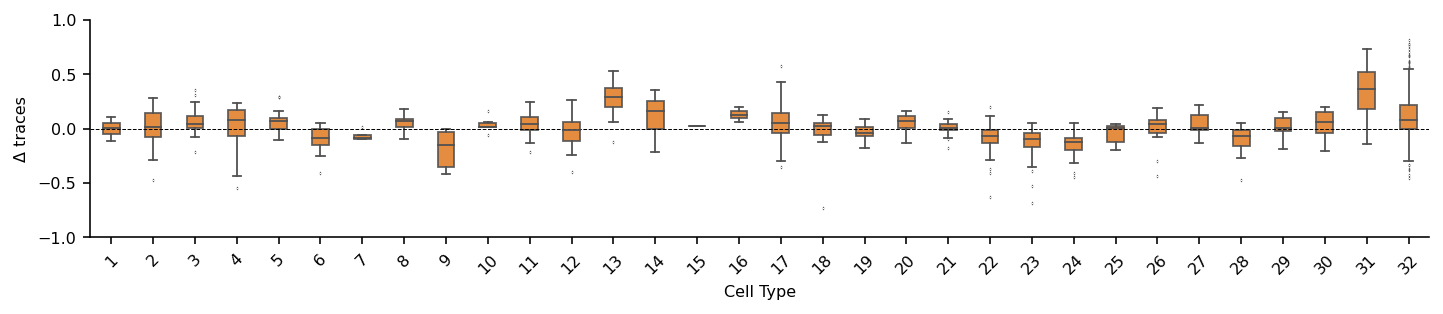

In [9]:
fig,ax = plt.subplots(1,1,figsize=(12,2))

sns.boxplot(data=df_diff_ctrl_dataset, 
               x="cluster_id", 
               y="diff", 
               linewidth=.9,
               boxprops=dict(alpha=.9),
               color=color_ctrl2,
               fliersize=0.01,
               ax=ax,
               width=0.4)

ax.legend([],frameon=False)   
ax.set_ylabel('\u0394 traces',fontsize=8)
ax.set_xlabel('Cell Type',fontsize=8)
ax.set_ylim(-1.,1.)
ax.axhline(0,lw=0.5,ls='--',color='k')
ax.tick_params(axis='both', which='major', labelsize=8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
sns.despine()

# --------------------------------------------------------------------------------------------------------------------

# Statistics

In [10]:
p_values_ctrl = np.zeros(len(good_types))

for i,j in enumerate(good_types):
    ctrl=df_diff_ctrl_dataset[df_diff_ctrl_dataset['cluster_id']==j+1]['diff'].values
    p_values_ctrl[i] = stats.ttest_1samp(ctrl, popmean=0.0)[1]
alpha_bonf_corrected = 0.05/len(good_types)

In [11]:
print('Adapting RGC types (Ctrl): '+str(good_types[p_values_ctrl<=alpha_bonf_corrected]+1))

Adapting RGC types (Ctrl): [13 14 17 22 23 24 28 31 32]
